<p style="font-size:250%" ><b>Plant Biology 2020 Workshop</b></p>
<p style="font-size:175%" >How Machine Learning can be used to solve plant biology problems</p>

* __Time/date__: 3:30-4:30pm, 7/29/20 (US Eastern time)
* __Facilitator__: Shin-Han Shiu, Michigan State University
* __Moderator__: Serena Lotreck, Michigan State University
* __Material__: [ShiuLab ML workshop repository](https://github.com/ShiuLab/ML_workshop/blob/master/readme.md)

# __The five step workflow__

![](img/0_ml_workflow.png)

# __Step 1. Turning biological questions into ML problems__

## Biological question

<div class="alert alert-block alert-success">
<b>What kinds of paralogous gene pairs tend to have strong fitness effects when mutated?</b>
</div>

## Machine learning problem

<div class="alert alert-block alert-warning">
<b>How can we build a machine learning model to predict fitness of gene pairs when they are mutated?</b>
</div>

# __Step 2. Data collection and processing__

## __2.1 Data collection__

Five types of information have been collected/generated
* Single and double mutant fitness
* Annotation: e.g., Gene Ontology
* Biochemical measurements: e.g. transcript levels
* Comparative genomics: e.g. sequence similarities
* Composite features: Principle components of features

Data size
* 8,160 paralogous gene pairs
* ~18,000 features between gene pairs
  * For this demo, 100 features were pre-selected.

## __2.2 Examine data__

### In this examples, there are many problems

![](img/2_data_table_problems.png)

### Read data into a data frame

In [2]:
from pathlib import Path 

data_file = Path("./data/matrix_dm-fitness_features_modnames.csv")

In [3]:
import pandas as pd     

# Read the comma-delimited file (csv) into a data frame (df)
df = pd.read_csv(data_file) 

### Check how many rows and columns

In [4]:
df.shape

(8160, 102)

There are:
* 8160 rows
* 102 columns

### Look at the first few rows of the data

In [5]:
df.head()

,index,fitness,GOslim_num_overlap,GOslim_%_overlap,full_GO_num_overlap,full_GO_%_overlap,PPI_total,PPI_num_overlap,PPI_%_overlap,37C_ORF_Chz1_reg_bind_max,...,25C_TSS_Bur6_reg_bind_difference,25C_ORF_Uga3_reg_bind_max,GO_PCA_Dim1,GO_PCA_Dim3,GO_PCA_Dim4,SM_max_fitness,SM_min_fitness,SM_fitness_difference,SM_fitness_avg,SM_fitness_total
0,0,0.8098,NaN,28.571429,2.0,33.333333,6.0,0.0,0.000000,-0.72,...,7.000000e-01,0.67,-0.998186,0.875158,-0.168471,1.0385,0.7056,0.3329,0.87205,1.7441
1,1,1.0400,4.0,NaN,1.0,14.285714,19.0,0.0,0.000000,-0.40,...,5.100000e-01,0.31,-1.393140,1.317389,-0.398198,1.0130,1.0117,0.0013,1.01235,2.0247
2,2,0.9143,2.0,25.000000,3.0,NaN,15.0,1.0,6.666667,0.58,...,5.551115e-17,-0.51,-1.278924,1.515681,0.788125,0.9945,0.9065,0.0880,0.95050,1.9010
3,3,0.9395,4.0,50.000000,4.0,33.333333,17.0,0.0,0.000000,0.36,...,1.010000e+00,0.08,-1.499192,-3.729416,0.254523,1.0455,0.9920,0.0535,1.01875,2.0375
4,4,0.9792,4.0,100.000000,8.0,66.666667,61.0,0.0,0.000000,0.63,...,1.900000e-01,0.02,0.102606,-0.448486,-0.740647,1.0292,1.0003,0.0289,1.01475,2.0295


Note that some cells do not have value:
* NaN: not a number

### List the fist 10 columns

In [6]:
list(df)[:10]

['index',
 'fitness',
 'GOslim_num_overlap',
 'GOslim_%_overlap',
 'full_GO_num_overlap',
 'full_GO_%_overlap',
 'PPI_total',
 'PPI_num_overlap',
 'PPI_%_overlap',
 '37C_ORF_Chz1_reg_bind_max']

## __2.3 Summarize the data__

### Get a sense of what types of data are in the table

We want to know what datatypes our features are:
* This allows us to decide how to pre-process our data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8160 entries, 0 to 8159
Columns: 102 entries, index to SM_fitness_total
dtypes: float64(101), int64(1)
memory usage: 6.4 MB


* Numerical features will be `int64` or `float64`
* Categorical features are type `object` <br>

### Look at summary statistics of the data

Why do we need to do this?
* Get a sense of what's in the data
* See if there are any systematic issues with the data

In [8]:
# Just look at a few columns here 
columns = ['fitness', 'GOslim_num_overlap', 'PPI_total']

df[columns].describe()

,fitness,GOslim_num_overlap,PPI_total
count,8160.000000,8159.000000,8160.000000
mean,0.872332,3.963108,87.969853
std,0.214833,2.042089,97.874829
min,-0.092400,0.000000,1.000000
25%,0.801400,3.000000,34.000000
50%,0.955950,4.000000,53.000000
75%,1.014100,5.000000,105.000000
max,1.279900,18.000000,922.000000


### Look at distribution and relationships

Why do we need to do this?
* Get a sense how your features are distributed
* Check if any features are highly correlated 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002771BB93C48>,
      dtype=object)

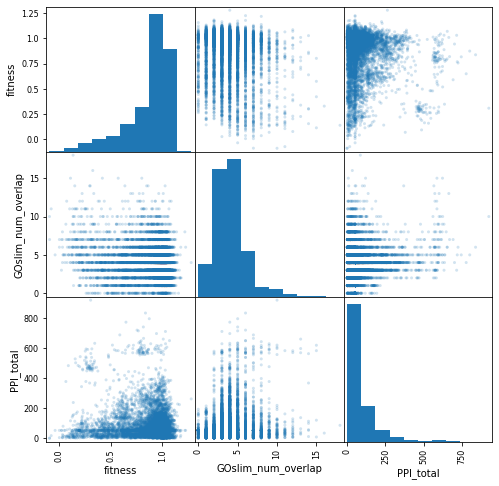

In [9]:
pd.plotting.scatter_matrix(df[columns], figsize=(8,8), alpha=0.2)

In [66]:
df[['fitness', 'PPI_total']].corr(method="spearman")

,fitness,PPI_total
fitness,1.000000,-0.057556
PPI_total,-0.057556,1.000000


## __2.4 Data processing__

### Before fixing the problems, specify labels (y) and features (X)

In [11]:
df.iloc[:3, :5] # Look at the first 3 rows and the first 5 columns

,index,fitness,GOslim_num_overlap,GOslim_%_overlap,full_GO_num_overlap
0,0,0.8098,NaN,28.571429,2.0
1,1,1.0400,4.0,NaN,1.0
2,2,0.9143,2.0,25.000000,3.0


* Labels (y) are in the second column.

In [12]:
y = df.iloc[:, 1].to_numpy() # col index=1 --> fitness, labels

* Features (X) are in the columns after y.

In [13]:
X = df.iloc[:, 2:-5]         # col index=2 till before the last 5 -> features

In [14]:
X.shape, y.shape

((8160, 95), (8160,))

### Normalize (scale) the data

E.g., standardize features by removing the mean and scaling to unit variance

![](img/2_data_processing_scaling.png)

In [15]:
from sklearn.preprocessing import StandardScaler # Import scaler

In [16]:
std_scaler = StandardScaler()                    # Create scaler object

In [67]:
std_scaler.fit(X)                 # Fit the scaler with feature data

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
X_scale = std_scaler.transform(X) # Transform feature data with scaler

In [69]:
X_scale.shape                                    # Shape is not changed

(8160, 95)

### Effect of standard scaling

Using PPI_overlap as an example

Text(0.5, 0, 'Standardized PPI_num_overlap')

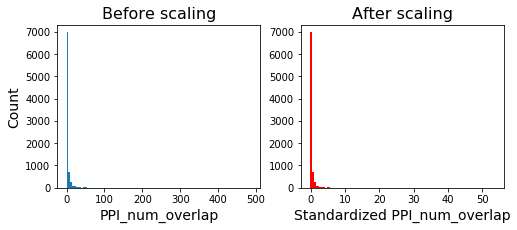

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.hist(X['PPI_num_overlap'], bins=100)
plt.title("Before scaling", fontsize=16)
plt.xlabel("PPI_num_overlap", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.subplot(122)
plt.hist(X_scale[:,5], bins=100, color="red")
plt.title("After scaling", fontsize=16)
plt.xlabel("Standardized PPI_num_overlap", fontsize=14)

### For categorical features: need to binarize or onehot-encode them

<img src="img/2_data_processing_binarize_onehot.png" width=1200>

<div class="alert alert-warning">
    <strong>NOTE:</strong> In our demo dataset, there is no categorical feature, so we didn't need to do this step.
</div>

### Deal with missing data
__Imputation__: filling missing data based on some assumptions.

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
# Create an imputer object, using medians to fill missing data
imputer = SimpleImputer(strategy="median") 

In [23]:
# Fit imputer with the scaled data and then transform (impute) it
X_impute = imputer.fit_transform(X_scale)   

In [20]:
# BEFORE
X_scale[:3,:5] # The first 3 rows of the first 5 columns

array([[        nan, -0.31094602, -1.18259597, -0.10537074, -0.83754809],
       [ 0.01806681,         nan, -1.51747879, -0.9703313 , -0.70471724],
       [-0.96138252, -0.47237288, -0.84771316,         nan, -0.74558827]])

In [24]:
# After
X_impute[:3,:5]

array([[ 0.01806681, -0.31094602, -1.18259597, -0.10537074, -0.83754809],
       [ 0.01806681, -0.24637528, -1.51747879, -0.9703313 , -0.70471724],
       [-0.96138252, -0.47237288, -0.84771316, -0.17417442, -0.74558827]])

<div class="alert alert-danger">
    <strong>CAUTION:</strong> There are many ways to scale, encode, and impute the data.</div> 
    

* What we've shown here is a fairly standard approach, but it may not be the appropriate method for your data or your model. 
* To make sure the best approach is used, it is a good practice to use multiple pre-processing approaches and build a model for each to evaluate which one is the best. 
* It is also possible that the best approach is without scaling at all.

# __BEFORE NEXT STEP: Separate training and testing data__

![](img/2_data_train_test_split.png)

<div class="alert alert-danger">
    <strong>CAUTION:</strong> Some ML practitioners advocate splitting the test set as early as possible, even before examining or imputing data as we have just done. This is to avoid <i>data snooping bias</i>: our brains are excellent pattern detectors, and some unconscious bias about our expectations can influence our pre-processing steps if we aren't careful.
</div>

### Specify random seed number for reproducibility

In [25]:
rand_seed = 20200729

### Split data with train_test_split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_impute,              # Scaled and imputed feature values 
    y,                     # labels
    test_size=0.2,         # 20% are for testing
    random_state=rand_seed)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6528, 95), (1632, 95), (6528,), (1632,))

# __Step 3. Feature engineering__

![](img/3_feat_engr_intro.png)

![](img/3_feat_engr_select.png)

## __3.1 Feature selection using an intermediate model__

## __Overall process__

![](img/3_feat_engr_select_fit_transform.png)

### Generate an intermediate model with Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
# Create a RandomForestRegressor object with default parameters
rf_reg = RandomForestRegressor(n_jobs=-1,               # Use all CPUs
                               verbose=1,               # Tell us what's going on during the run
                               random_state=rand_seed) 

In [31]:
# Fit the model with training data
rf_reg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=20200729, verbose=1, warm_start=False)

<div class="alert alert-warning">
    <strong>NOTE:</strong> There are many different feature selection methods. We've chosen the Random Forest regression model because it generates feature importance values, which we can use to select features for our model.
</div>

## __3.2 Select features based on the trained model__

### SelectFromModel 
Uses the feature importance scores generated by the Random Forest model to choose the top features.


In [32]:
from sklearn.feature_selection import SelectFromModel

In [33]:
selector20 = SelectFromModel(rf_reg,           # The model we just trained
                             prefit=True,      # model already fitted
                             max_features=20)  # Select top 20

In [34]:
# Used the selector to transform (i.e., select features from) training data
X_train_select20 = selector20.transform(X_train)

In [35]:
# Also transform testing data using the already-fitted selector
X_test_select20 = selector20.transform(X_test)

In [36]:
print(f"Before:{X_train.shape}")
print(f"After :{X_train_select20.shape}")

Before:(6528, 95)
After :(6528, 20)


In [37]:
# Get selected feature names
feat_names    = list(X.columns)
feat_selected = selector20.get_support()

feat20 = []
for name, selected in zip(feat_names, feat_selected):
    if selected:
        feat20.append(name)

print(feat20)

['GOslim_%_overlap', 'full_GO_%_overlap', 'PPI_total', 'PPI_%_overlap', '37C_ORF_Chz1_reg_bind_max', '37C_UAS1_Jhd2_reg_bind_min', '37C_UAS1_Xbp1_reg_bind_avg', 'isoelectric_point_difference', '25C_UAS1_Yap1_reg_bind_min', 'phosphorylation_of_PolII_CDT_GO_num', 'nucleotidyltransferase_activity_goslim_num', 'SAM_biosyn_process_GO_num', 'transferase_activity_goslim_num', '25C_TSS_Rpb2_reg_bind_pair_total', '25C_ORF_Zms1_reg_bind_max', '25C_TSS_Ssl1_reg_bind_min', '25C_TSS_Ncb2_reg_bind_difference', 'GO_PCA_Dim1', 'GO_PCA_Dim3', 'GO_PCA_Dim4']


<div class="alert alert-danger">
    <strong>CAUTION:</strong> Typically we will select multiple sets of features; for example, sets with different numbers of features, starting from 5 and going to include all the features. This is to see if there is an optimal number of features. However, here we only look at 20 features for simplicity.
</div>

## __3.3. Consider additional features__

<img src="img/3_feat_engr_sources.png" width=1200>

<div class="alert alert-warning">
    <strong>NOTE:</strong> Because of the time constraint, we won't be showing an example of this.
</div>

# __Step 4. Model/algorithm selection__

## __Choosing among candidate models__

![](img/4_model_select_intro.png)

## __4.1 You generate not just one but many models__

### Reason 1: There are many algorithms to choose from

<img src="img/4_model_select_sklearn.png" width=1200>

### Reason 2: Each model/algorithm has many possible hyperparameters

![](img/4_model_select_hyperparameter.png)

### Reason 3: Each algorithm/hyperparameter combination needs to be cross-validated

![](img/4_model_select_cv.png)

## __4.2 Impact of ML algorithm choice__

### Split training data into training and validation subsets

Why: we want to see if the model trained with the training subset can predict the validation subset well.
* If it does, the model can potentially work well on new cases.

In [38]:
X_train_sub, X_valid_sub, y_train_sub, y_valid_sub = train_test_split(
    X_train_select20,      # Training features         
    y_train,               # Training labels
    test_size=0.2,         # 20% are for VALIDATION
    random_state=rand_seed)

In [39]:
X_train_sub.shape, X_valid_sub.shape, y_train_sub.shape, y_valid_sub.shape

((5222, 20), (1306, 20), (5222,), (1306,))

### Try Simple Linear Regression with default

In [40]:
from sklearn.linear_model import LinearRegression  # Import ML model/algorithm

In [41]:
lin_reg = LinearRegression()           # Create a linear regressor object

In [42]:
lin_reg.fit(X_train_sub, y_train_sub)  # Pass feautres and labels to fit the regressor object

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#########################
# Get predictions for:  #
#########################

## Training data
y_train_pred = lin_reg.predict(X_train_sub)

## Validation data
y_valid_pred = lin_reg.predict(X_valid_sub)

In [ ]:
from scipy.stats import pearsonr

#############################################################
# Calculate how well true y and predicted y are correlated  #
#############################################################

## For training data
r2_train = pearsonr(y_train_sub, y_train_pred)[0]**2

## For validaton data
r2_valid = pearsonr(y_valid_sub, y_valid_pred)[0]**2

In [44]:
print(f'r2_train:{r2_train}')
print(f'r2_valid:{r2_valid}')

r2_train:0.2450295927577849
r2_valid:0.3006198402259062


Text(0.5, 0, 'True y')

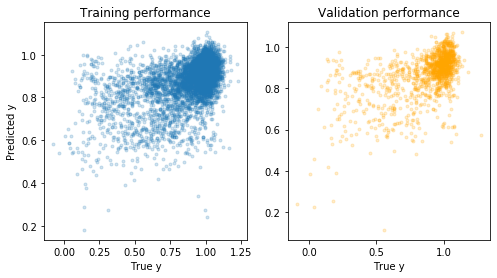

In [45]:
# Plotting
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("Training performance")
plt.plot(y_train_sub, y_train_pred, ".", alpha=0.2)
plt.xlabel("True y"); plt.ylabel("Predicted y")
plt.subplot(122)
plt.title("Validation performance")
plt.plot(y_valid_sub, y_valid_pred, ".", color="orange", alpha=0.2)
plt.xlabel("True y")

In [46]:
r2_train  # Goodness-of-fit on training data

0.2450295927577849

In [65]:
r2_valid  # Goodness-of-fit on validation data

0.3006198402259062

In [47]:
# Function for plotting true vs. predicted values
def plot_true_vs_prediction(model, X_train, y_train, X_valid, y_valid):
    
    ###############################
    # Apply model to the feature data (X) to make predictions (y)
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)

    ###############################
    # Calculate how well true y and predicted y are correlated
    r2_train = str(pearsonr(y_train, y_train_pred)[0]**2)[:4]
    r2_valid = str(pearsonr(y_valid, y_valid_pred)[0]**2)[:4]
    
    # Print out r2 values
    print(f'r2_score training   = {r2_train}')
    print(f'r2_score validation = {r2_valid}')

    # Plotting
    plt.figure(figsize=(8,4))
    plt.subplot(121)
    plt.title("Training performance")
    plt.plot(y_train, y_train_pred, ".", alpha=0.2)
    plt.xlabel("True y"); plt.ylabel("Predicted y")
    plt.subplot(122)
    plt.title("Validation performance")
    plt.plot(y_valid, y_valid_pred, ".", color="orange", alpha=0.2)
    plt.xlabel("True y")
    
    plt.show()

### Try Support Vector Regressor with default

In [48]:
from sklearn.svm import SVR

sv_reg = SVR()

sv_reg.fit(X_train_sub, y_train_sub)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

r2_score training   = 0.66
r2_score validation = 0.45


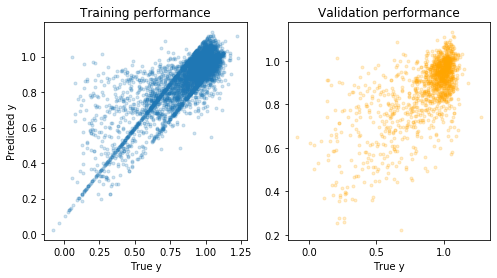

In [49]:
plot_true_vs_prediction(sv_reg, X_train_sub, y_train_sub, X_valid_sub, y_valid_sub)

### Try Random Forest regressor with default

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(oob_score=True) # Create a model object

rf_reg.fit(X_train_sub, y_train_sub) # Fit the training data to the model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

r2_score training   = 0.95
r2_score validation = 0.59


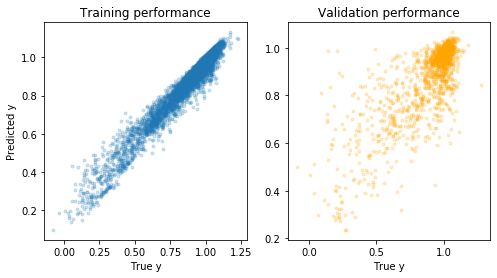

In [51]:
plot_true_vs_prediction(rf_reg, X_train_sub, y_train_sub, X_valid_sub, y_valid_sub)

<div class="alert alert-danger">
 <strong>CAUTION:</strong> The above are quick looks at different ML algorithms. But to choose the best one formally, you'd need to go through Step 4.3 for every single algorithm you try.
</div>

## __4.3 Parameter tuning and cross-validation__

### Define ranges of parameters that will be tuned

In [52]:
from scipy.stats import randint

# Search the following parameters
param_grid = {
    "n_estimators": randint(low=20, high=200), # random integer from 20 to 200
    "max_depth"   : randint(low=2 , high=20),
    "max_features": ['auto', 'sqrt', 'log2']   # 3 options 
}

### Use RandomizedSearchCV to search parameters and do cross validation

In [53]:
# Create model object
rf = RandomForestRegressor(oob_score=True)

In [54]:
from sklearn.metrics import make_scorer, r2_score

# Make scorer
r2_scorer = make_scorer(r2_score)

In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Create randomized search object
rnd_search = RandomizedSearchCV(
    rf,                                # Model used
    param_distributions=param_grid,    # Parameter distribution
    verbose=2,                         # Provide details on runs
    n_iter=200,                        # Search 200 parameter combinations
    cv=5,                              # Five-fold cross validation
    scoring=r2_scorer,                 # Scoring function
    random_state=rand_seed,            # Random seed number for reproducibility
    n_jobs=15)                         # Run on as many CPUs as you have

<div class="alert alert-danger">
    <strong>CAUTION:</strong> The following step takes a long time to run. On a 64GB RAM machine with 15 CPU, this takes 2.5 minutes; that means it could take up to 45 minutes or more on a machine with a single CPU.
</div>

In [56]:
rnd_search.fit(X_train_select20, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:    3.5s
[Parallel(n_jobs=15)]: Done 132 tasks      | elapsed:   23.8s
[Parallel(n_jobs=15)]: Done 335 tasks      | elapsed:   54.7s
[Parallel(n_jobs=15)]: Done 618 tasks      | elapsed:  1.5min
[Parallel(n_jobs=15)]: Done 1000 out of 1000 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In order to be able to apply this model to new instances in the future, we need to save the model. It can then later be loaded using `joblib.load()`

In [57]:
import joblib

# Save the model
joblib.dump(rnd_search, Path('./models/model_train_select20_rf_rnd_search.joblib'))

['models\\model_train_select20_rf_rnd_search.joblib']

### Look into the best model

In [58]:
# The best parameter combination
rnd_search.best_params_

{'max_depth': 19, 'max_features': 'auto', 'n_estimators': 177}

In [59]:
# The mean cross-validated score of the best estimator
rnd_search.best_score_

0.5479868615983988

<div class="alert alert-danger">
 <strong>CAUTION:</strong> Athough the performance after tuning/cross-validation is not better compared to the default run (r2=0.59), hyperparameter tuning should always be done, because most of the time the default is not the optimal set of hyperparameters.
</div>

## __4.4 Improving model__

<div class="alert alert-success"> 
<strong>Step 1. Question</strong>: Is this the right way to ask the question? Is this the right question?
</div>

<div class="alert alert-success"> 
<strong>Step 2. Data processing</strong>: What are the other ways for processing the data? Can the data be scaled and imputed differently? Are there errors during data processing? Are there mistakes in our data in the first place? Can we get more and better data?
</div>

<div class="alert alert-success">
<strong>Step 3. Feature engineering</strong>: Can we inluclude more features? Are some transformations of features better for modeling? Are some features more useful if they are combined? Are you using the optimal number of features? Are there better ways to select features?
</div>

<div class="alert alert-success">
<strong>Step 4. Model/algorithm selection</strong>: What other algorithms and hyperparameters should be examined? Have we made any mistakes in how we trained the model?
</div>

# __Step 5. Model application and interpretation__

## __5.1 Evaluate model with an independent testing data__

![](img/5_model_appl_evaluate.png)

### Get the best model from the randomized search

In [60]:
best_model = rnd_search.best_estimator_
best_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=19, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=177, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

### Apply model to the test set features to make predictions

0.5338401741316571

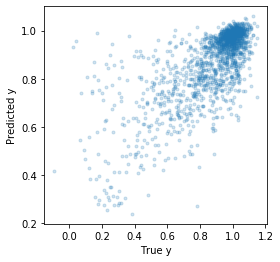

In [71]:
y_test_pred = best_model.predict(X_test_select20)

plt.figure(figsize=(4,4))
plt.plot(y_test, y_test_pred, ".", alpha=0.2)
plt.xlabel("True y"); plt.ylabel("Predicted y")

pearsonr(y_test, y_test_pred)[0]**2

## __5.2 Apply model to new cases__

![](img/5_model_appl_new_cases.png)

<div class="alert alert-warning">
    <strong>NOTE:</strong> In this case, don't have any unknown or new instances to apply the model on.
</div>

## __5.3 Learn from the model__

### Examine the relative importance of features

In [62]:
# selected features
feat20

['GOslim_%_overlap',
 'full_GO_%_overlap',
 'PPI_total',
 'PPI_%_overlap',
 '37C_ORF_Chz1_reg_bind_max',
 '37C_UAS1_Jhd2_reg_bind_min',
 '37C_UAS1_Xbp1_reg_bind_avg',
 'isoelectric_point_difference',
 '25C_UAS1_Yap1_reg_bind_min',
 'phosphorylation_of_PolII_CDT_GO_num',
 'nucleotidyltransferase_activity_goslim_num',
 'SAM_biosyn_process_GO_num',
 'transferase_activity_goslim_num',
 '25C_TSS_Rpb2_reg_bind_pair_total',
 '25C_ORF_Zms1_reg_bind_max',
 '25C_TSS_Ssl1_reg_bind_min',
 '25C_TSS_Ncb2_reg_bind_difference',
 'GO_PCA_Dim1',
 'GO_PCA_Dim3',
 'GO_PCA_Dim4']

Text(0.5, 0, 'Feature importance')

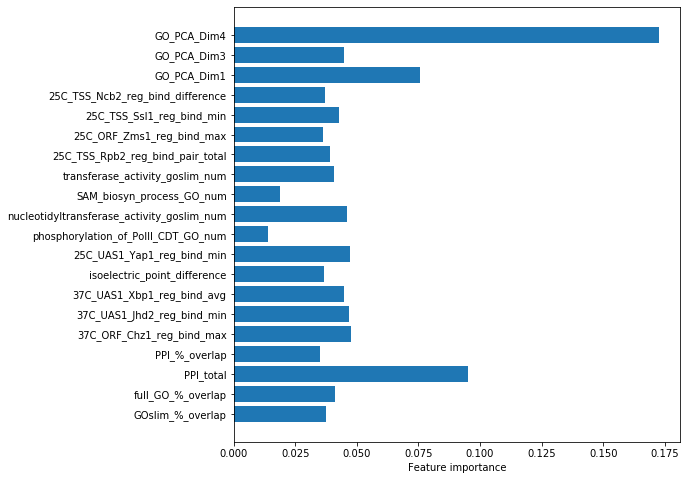

In [63]:
import numpy as np

importance    = best_model.feature_importances_                        

fig, ax  = plt.subplots(figsize=(8,8))
y_pos    = np.asarray(range(len(feat20))) # For plotting y positions      

# bar plot horizontal
ax.barh(y_pos, importance) 
ax.set_yticks(y_pos)
ax.set_yticklabels(feat20)
ax.set_xlabel("Feature importance")

## Looking at how predictions are made

<img src="img/5_model_appl_interpret.png" width=800>

<div class="alert alert-warning">
 <strong>Note:</strong> There are a number of strategies to learn more from the model which cannot be further explored here due to time constraints.
</div>

Back to powerpoint